# ***Importante: Partición***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Datos_Saber_Pro_Preprocesed.csv')
df.shape

(332228, 22)

In [3]:
def stratified_categorical_sample(df, target_column, sample_frac=0.3, random_state=42):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_sample, _, y_sample, _ = train_test_split(
        X, y, train_size=sample_frac, stratify=y, shuffle=True,random_state=random_state
    )

    df_sample = X_sample.copy()
    df_sample[target_column] = y_sample

    full_dist = df[target_column].value_counts().sort_index()
    sample_dist = df_sample[target_column].value_counts().sort_index()

    contingency = pd.concat([full_dist, sample_dist], axis=1)
    contingency.columns = ['Full', 'Sample']

    chi2_stat, p_value, _, _ = chi2_contingency(contingency)

    stats = {
        'Chi-square_statistic': chi2_stat,
        'p_value': p_value,
        'Sample_size': len(df_sample),
        'Full_dataset_size': len(df)
    }

    return df_sample, stats


In [4]:
df_reduced, stats = stratified_categorical_sample(df, target_column='MOD_INGLES_DESEM', sample_frac=0.31)

display(df_reduced.shape)
display(stats)

(102990, 22)

{'Chi-square_statistic': np.float64(1.7478526247740735e-05),
 'p_value': np.float64(0.9999999999618129),
 'Sample_size': 102990,
 'Full_dataset_size': 332228}

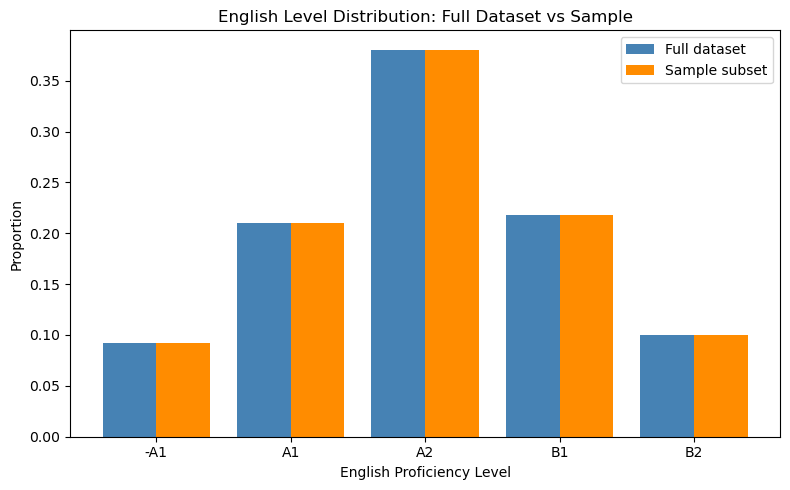

In [5]:
def plot_target_distribution_comparison(full_df, sample_df, target_column):
    full_counts = full_df[target_column].value_counts(normalize=True).sort_index()
    sample_counts = sample_df[target_column].value_counts(normalize=True).sort_index()

    x = range(len(full_counts))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar([i - 0.2 for i in x], full_counts.values, width=0.4, label='Full dataset', color='steelblue')
    ax.bar([i + 0.2 for i in x], sample_counts.values, width=0.4, label='Sample subset', color='darkorange')

    ax.set_xticks(x)
    ax.set_xticklabels(full_counts.index)
    ax.set_title('English Level Distribution: Full Dataset vs Sample')
    ax.set_ylabel('Proportion')
    ax.set_xlabel('English Proficiency Level')
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_target_distribution_comparison(df, df_reduced, target_column='MOD_INGLES_DESEM')


In [6]:
print("Distribution of MOD_INGLES_DESEM in the full dataset:")
display(df['MOD_INGLES_DESEM'].value_counts(normalize=True).sort_index())
print("Distribution of MOD_INGLES_DESEM in the sample subset:")
display(df_reduced['MOD_INGLES_DESEM'].value_counts(normalize=True).sort_index())

Distribution of MOD_INGLES_DESEM in the full dataset:


MOD_INGLES_DESEM
-A1    0.092400
A1     0.209775
A2     0.380438
B1     0.217561
B2     0.099826
Name: proportion, dtype: float64

Distribution of MOD_INGLES_DESEM in the sample subset:


MOD_INGLES_DESEM
-A1    0.092397
A1     0.209778
A2     0.380435
B1     0.217565
B2     0.099825
Name: proportion, dtype: float64

In [7]:
df_reduced.to_csv('../Saber_pro_sampled_data.csv', index=False)

In [9]:
df_reduced.shape

(102990, 22)